Checkout the Data

In [4]:
import pandas as pd

In [6]:
# Load the data
kickstarter_data = pd.read_csv('data/kickstarter_projects.csv')

# Display d.type

# Display an overview of the data
kickstarter_data.head(10)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed


Checkout: 
- Dollar or Euro in GOALS
- Time vs Date in LAUNCHED
- Canceld? in STATE (Target)
- Chancelation Date not there? --> Compare Backers which Cancelled
- GOALS, PLEDGES, BACKERS has Outliers
- SUBCATEGORIE AND CATERGORIE need one hot encoding
- ID needs to be cleaned
- NAME needs some kind of segmentic analysis 
- PreLaunch vs. PostLaunch Analysis  !!


Confusion Matrix:
 [[29416 10093]
 [14123 12661]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71     39509
           1       0.56      0.47      0.51     26784

    accuracy                           0.63     66293
   macro avg       0.62      0.61      0.61     66293
weighted avg       0.63      0.63      0.63     66293



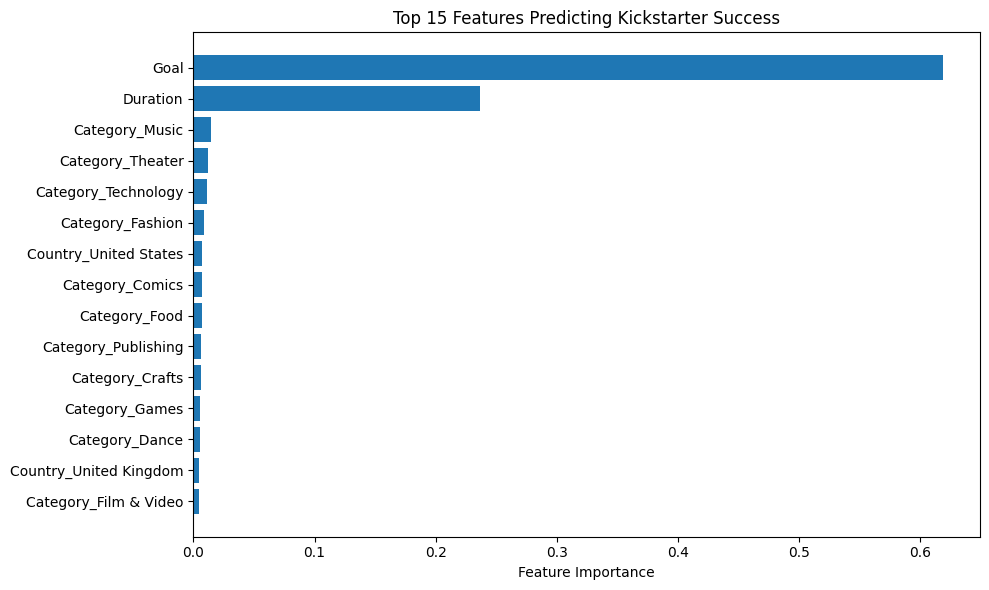

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("data/kickstarter_projects.csv")

# Keep only projects marked as 'Successful' or 'Failed'
df = df[df['State'].isin(['Successful', 'Failed'])].copy()
df['Successful'] = (df['State'] == 'Successful').astype(int)

# Convert date columns
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])
df['Duration'] = (df['Deadline'] - df['Launched']).dt.days

# Keep only relevant features for pre-launch modeling
df = df[['Goal', 'Duration', 'Category', 'Country', 'Successful']]

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Category', 'Country'], drop_first=True)

# Train-test split
X = df_encoded.drop(columns='Successful')
y = df_encoded['Successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot top 15 feature importances
importances = model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features Predicting Kickstarter Success')
plt.tight_layout()
plt.show()

# Improved Kickstarter Success Prediction Model

Implementing various improvements including:
1. Feature Engineering
2. Advanced Model with Hyperparameter Tuning
3. Cross-Validation
4. Class Imbalance Handling
5. Additional Model Evaluation Metrics

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/thomashubbert/Development/kickstart_ml/.venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <54A1AE05-1E14-3DA2-A8D0-062134694298> /Users/thomashubbert/Development/kickstart_ml/.venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/thomashubbert/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/thomashubbert/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/Users/thomashubbert/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/thomashubbert/.pyenv/versions/3.11.3/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]


In [ ]:
# Load and preprocess data
df = pd.read_csv('data/kickstarter_projects.csv')

# Convert date columns to datetime
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])

# Feature Engineering
# Time-based features
df['Duration'] = (df['Deadline'] - df['Launched']).dt.days
df['Launch_Month'] = df['Launched'].dt.month
df['Launch_DayOfWeek'] = df['Launched'].dt.dayofweek
df['Launch_Quarter'] = df['Launched'].dt.quarter
df['Launch_Hour'] = df['Launched'].dt.hour

# Goal-based features
df['Log_Goal'] = np.log1p(df['Goal'])
df['Goal_Per_Day'] = df['Goal'] / df['Duration']

# Create price ranges/bins
df['Goal_Bins'] = pd.qcut(df['Goal'], q=10, labels=['Q'+str(i) for i in range(1,11)])

# Text-based features (basic)
df['Name_Length'] = df['Name'].str.len()
df['Name_Word_Count'] = df['Name'].str.count(' ') + 1

# Keep only successful and failed projects
df = df[df['State'].isin(['Successful', 'Failed'])].copy()
df['Successful'] = (df['State'] == 'Successful').astype(int)

# Prepare features for modeling
categorical_features = ['Category', 'Subcategory', 'Country', 'Goal_Bins']
df_encoded = pd.get_dummies(df, columns=categorical_features)

In [ ]:
# Prepare features and target
feature_cols = [col for col in df_encoded.columns if col not in ['Successful', 'ID', 'Name', 'State', 'Launched', 'Deadline', 'Pledged', 'Backers']]
X = df_encoded[feature_cols]
y = df_encoded['Successful']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
numerical_features = ['Goal', 'Duration', 'Log_Goal', 'Goal_Per_Day', 'Launch_Month', 'Launch_DayOfWeek', 
                     'Launch_Quarter', 'Launch_Hour', 'Name_Length', 'Name_Word_Count']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Create SMOTE pipeline with XGBoost
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}

# Create pipeline with SMOTE and XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

# Set up parameters for grid search
pipeline_params = {
    'classifier__' + key: value for key, value in xgb_params.items()
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, pipeline_params, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
# Model Evaluation
# Get predictions
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.3f}")

# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Feature importance and additional evaluation
feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\nTop 15 most important features:")
for f in range(min(15, len(feature_names))):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(15), feature_importance[indices[:15]])
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='f1')
print("\nCross-validation scores:", cv_scores)
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")